In [1]:
# Harbinger Package
# version 1.0.707

source("https://raw.githubusercontent.com/cefet-rj-dal/harbinger-examples/main/jupyter.R")

#loading Harbinger
load_library("daltoolbox") 
load_library("harbinger") 

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Loading required package: harbinger



In [2]:
#loading the example database
data(har_examples)

In [3]:
#Using the time series 9
dataset <- har_examples$example9
head(dataset)

,serie,event
,<dbl>,<lgl>
1,-1.1597821,FALSE
2,-1.5782775,FALSE
3,-1.5653926,FALSE
4,-0.7182375,FALSE
5,0.6003753,FALSE
6,0.1899022,FALSE


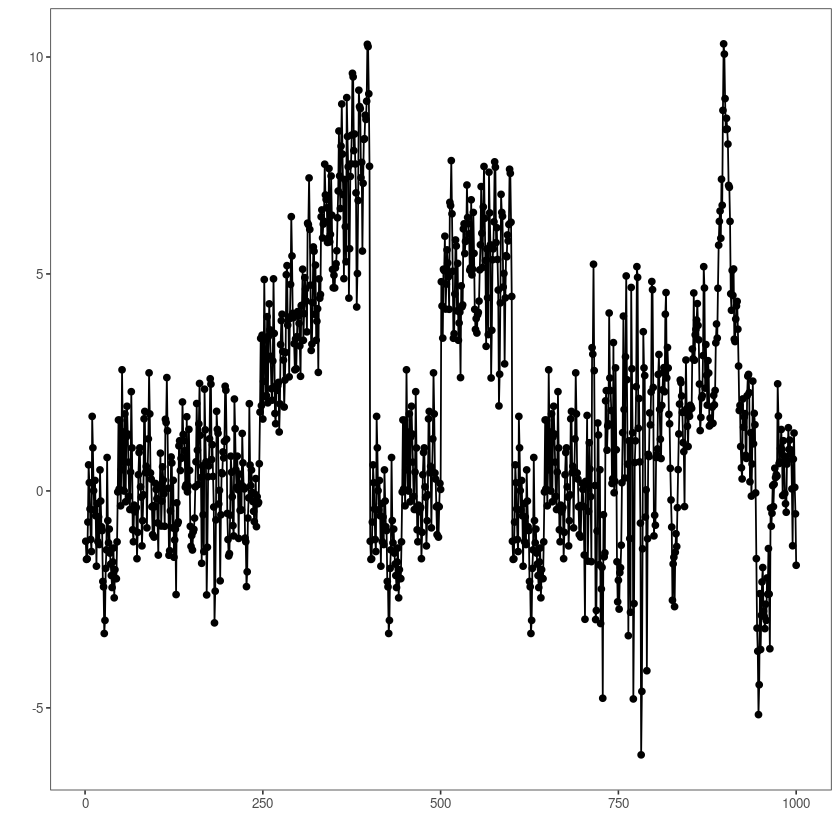

In [4]:
#ploting serie #1
plot_ts(x = 1:length(dataset$serie), y = dataset$serie)

In [5]:
# establishing garch method 
  model <- hanr_garch()

In [6]:
# fitting the model
  model <- fit(model, dataset$serie)

In [7]:
# making detections using garch
  detection <- detect(model, dataset$serie)

In [8]:
# filtering detected events
  print(detection |> dplyr::filter(event==TRUE))

  idx event    type
1 402  TRUE anomaly
2 602  TRUE anomaly
3 714  TRUE anomaly
4 744  TRUE anomaly
5 761  TRUE anomaly


In [9]:
# evaluating the detections
  evaluation <- evaluate(model, detection$event, dataset$event)
  print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      0     5    
FALSE     6     989  


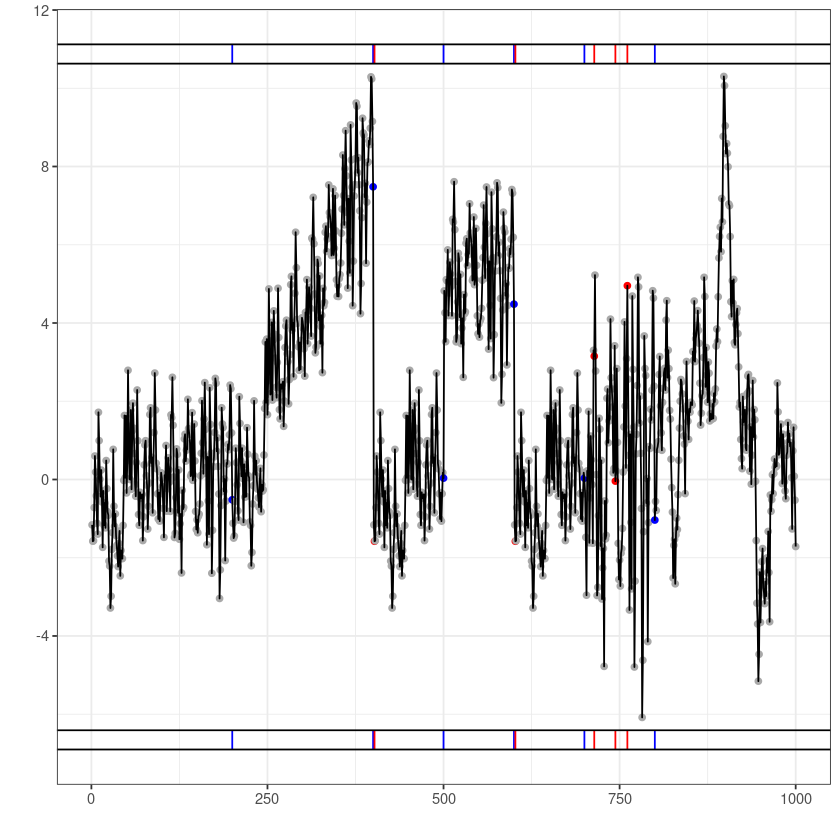

In [10]:
# ploting the results
  grf <- har_plot(model, dataset$serie, detection, dataset$event)
  plot(grf)